# <center>Math 589 Homework 1 Solution</center>
<center>Yuan Yin A20447290</center>

## Question 1
### (a)

$f(h)=\sqrt(h)+h$, $g(h)=\sqrt(h)$.

Then $\exists h_0>0$ is a constant and $C=1+\sqrt{h_0}$, as $0<h<h_0$,
$$
\frac{f(h)}{g(h)}=1+\sqrt{h}\le C.
$$

Then by definition, it satisfies
$$
|f(h)|\le C|g(h)|.
$$

We conclude that
$$
f(h) = O(g(h))\text{ as }h\to0.
$$

### (b)

$f(h)=h\log{h}+h^2$, $g(h)=h\log(h)$.

Then,
$$
\lim_{h\to0}\frac{f(h)}{g(h)}=\lim_{h\to0}(\frac{\log{h}}{\sqrt{h}}+\sqrt{h})=-\infty.
$$

Then by definition, the right hand side is neither bounded by a constant nor a function $\varepsilon(h)$ such that $\lim_{h\to0}\varepsilon(h)=0$.

We conclude that $f(h)$ is neither $O(g(h))$ nor $o(g(h))$.

### (c)

$f(h)=h\log{h}+h^2$, $g(h)=h^p$ with $1<p<2$.

Then,
$$
\lim_{h\to0}\frac{f(h)}{g(h)}=\lim_{h\to0}(\frac{\log{h}}{h^{p-1}}+h^{p-2})=-\infty.
$$

Then by definition, the right hand side is neither bounded by a constant nor a function $\varepsilon(h)$ such that $\lim_{h\to0}\varepsilon(h)=0$

We conclude that $f(h)$ is neither $O(g(h))$ nor $o(g(h))$.

## Question 2
### (a)
By Taylor Theorem
\begin{align*}
    u_{i+1} &= u_{i}+(u_x)_ih+\frac{(u_{xx})_i}{2!}h^2+\frac{(u_{xxx})_i}{3!}h^3+O(h^4)\\
    &= u_{i}+(u_x)_ih+\frac{(u_{xx})_i}{2}h^2+\frac{(u_{xxx})_i}{6}h^3+O(h^4)\\
    u_{i+2} &= u_{i}+(u_x)_i(2h)+\frac{(u_{xx})_i}{2!}(2h)^2+\frac{(u_{xxx})_i}{3!}(2h)^3+O(h^4)\\
    &= u_{i}+2(u_x)_ih+2(u_{xx})_ih^2+\frac{4(u_{xxx})_i}{3}h^3+O(h^4)
\end{align*}
where $(u_{xx})_i$ is the second derivative of u(x) at the grid point $x_i$ and $(u_{xxx})_i$ is the third derivative of u(x) at the grid point $x_i$.

Then by computation
\begin{equation*}
    4u_{i+1}-u_{i+2} = 3u_{i}+2(u_x)_ih-\frac{2(u_{xxx})_i}{3}h^3+O(h^4)
\end{equation*}

Rewrite the equation above, we get
\begin{align}
    (u_x)_i &= \frac{4u_{i+1}-u_{i+2}-3u_{i}+\frac{2(u_{xxx})_i}{3}h^3 +O(h^4)}{2h}\nonumber\\
    &= \frac{4u_{i+1}-u_{i+2}-3u_{i}}{2h}+\frac{(u_{xxx})_i}{3}h^2+O(h^3)\label{approx.error}\\
    &= \frac{1}{2h}(-3u_{i}+4u_{i+1}-u_{i+2})+O(h^2),\nonumber
\end{align}
Proved.

### (b)
Knowing that
$$
u(x) = e^{-x}\cos(3x),
$$
we can easily compute the first, second and third derivative of $u(x)$ as the following results:
\begin{align*}
u_x &= -e^{-x}\cos(3x)-3e^{-x}\sin(3x)\\
u_{xx} &= -8e^{-x}\cos(3x)+6e^{-x}\sin(3x)\\
u_{xxx} &= 26e^{-x}\cos(3x)+18e^{-x}\sin(3x)\\
\end{align*}

To find the upper bound of $u_{xxx}$, we can first compute it's first derivative:
\begin{equation*}
u_{xxxx} = 28e^{-x}\cos(3x)-96e^{-x}\sin(3x)
\end{equation*}
and we can easily check that $u_{xxxx}>0$ as $x=0$, $u_{xxxx}<00$ as $x\to\infty$. Then the maximum of $u_{xxx}$ is attained when $U_{XXXX}=0$. Solving this equation and we get:
\begin{align*}
&28e^{-x}\cos(3x)-96e^{-x}\sin(3x) = 0\\
&\Rightarrow\tan(3x) = \frac{7}{24} \\
&\Rightarrow x = \frac{\arctan{(7/24)}}{3}\approx0.0946.
\end{align*}
Thus, $\max{u_{xxx}}\approx27.2922$

Thus, using equation $\eqref{approx.error}$ from (a) above, to satisfy the condition statement in question, we get
\begin{align*}
&Approx Error = (u_x)_i - u'(x) = \frac{(u_{xxx})_i}{3}h^2+O(h^3)\le10^{-4}\\
&\Rightarrow \frac{27.2922}{3}h^2\le10^{-4}\\
&\Rightarrow h\le3.3154\times10^{-3}
\end{align*}

## Question 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# initialization

J = int(100)
dx = 1/J
x = np.array([dx*j for j in range(J+1)])

U = np.ones(len(x))
U[0] = 0
U[-1] = 0
mu = .498
# mu = .503
dt=mu*dx**2
T = 0.05478
# T = 0.0503
nt = int(T/dt)

# iteration
for n in range(nt):
    U = U[1:-1]+mu*(U[:-2]-2*U[1:-1]+U[2:])
    U = np.insert(U,0,0)
    U = np.append(U,0)

In [3]:
nterm = 100
u = np.zeros(len(x))
for n in range(nterm):
    u += 4/np.pi/(2*n+1)*np.exp(-np.pi**2*T*(2*n+1)**2)*np.sin((2*n+1)*np.pi*x)

### (a)
Compare the plots between the numerical and analytical results, we see

Text(0.5, 1.0, 't=0.05478')

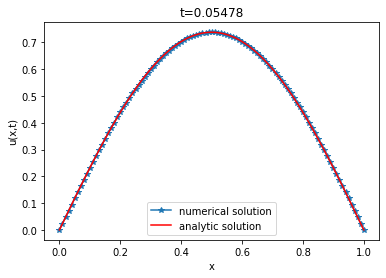

In [4]:
plt.plot(x, U, '*-', label='numerical solution')
plt.plot(x, u, 'r', label='analytic solution')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('t=0.05478')

Since the two plots are close to each other, we can conclude that using the parameter settings in question (a), the numerical converges to the analytical solution of the PDE in the statement.

### (b)
Compare the plots between the numerical and analytical results, we see

Text(0.5, 1.0, 't=0.0503')

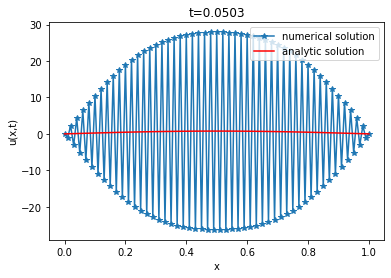

In [5]:
plt.plot(x, U, '*-', label='numerical solution')
plt.plot(x, u, 'r', label='analytic solution')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('t=0.0503')

The plots above shows that there is a dramatic difference between the numerical and analytical results when using the parameter settings in question (b). And we can see that the numerical result is oscillating, which indicates it's violating the stability condition.